In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the DataFrame from the Excel file
df = pd.read_csv('STADS_redundant_features.csv')

In [9]:
df.head(1)

,NEW_SMILES,pIC50,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,...,chi4v,hallKierAlpha,kappa1,kappa2,kappa3,Phi,Total Surface Area,Shape Index,Molecular Flexibility,Molecular Complexity
0,CC(=O)N(C)Cc1cc(C(=O)N(C)Cc2cc3ccccc3n2C)ccc1N,5.173925,378.476,6,2,5,1,4,28,54,...,3.275526,-3.28,19.480717,7.760914,3.856356,5.399577,298.0,0.53571,0.608,0.81905


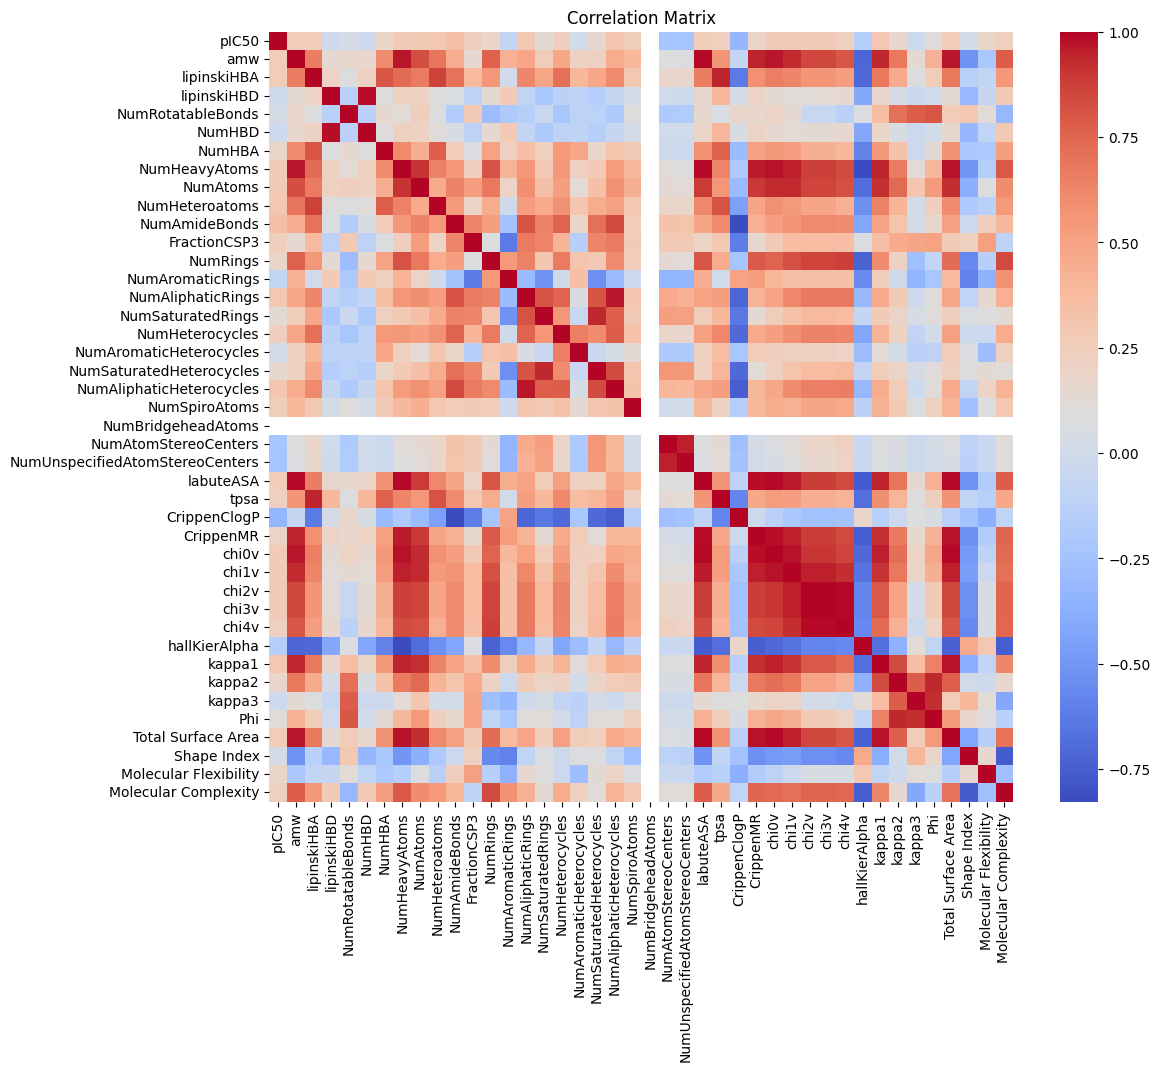

In [14]:
# Drop the 'NEW_SMILES' column for correlation calculation
df_numeric = df.drop(columns=['NEW_SMILES'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Display the correlation matrix as a heatmap without annotations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix')
plt.show()


## **Features with correlation greater than 0.85**

In [12]:
# Drop the 'NEW_SMILES' column for correlation calculation
df_numeric = df.drop(columns=['NEW_SMILES'])

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr().abs()  # Use absolute value to consider both positive and negative correlations

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.85
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]

# Drop the highly correlated columns 
df_reduced = df_numeric.drop(columns=to_drop)

# Display the columns that were dropped
print("Dropped columns due to high correlation:", to_drop)

# If you want to include the 'NEW_SMILES' column back into the reduced DataFrame:
df_reduced['NEW_SMILES'] = df['NEW_SMILES']



Dropped columns due to high correlation: ['NumHBD', 'NumHeavyAtoms', 'NumAtoms', 'NumHeteroatoms', 'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenMR', 'chi0v', 'chi1v', 'chi2v', 'chi3v', 'chi4v', 'kappa1', 'Phi', 'Total Surface Area']


In [13]:
df_reduced.shape

(209, 25)

In [ ]:
df_reduced.to_csv("Name your file.csv")